In [1]:
import qiskit
import numpy as np
import sys
sys.path.insert(1,'../')

from vqa.circuits import *
from vqa.vqm import *
import vqa.plateau

#import vqa.ansatz
#import vqa.base
#import vqa.constant
#import vqa.bounds
#import vqa.model
#import vqa.entanglement
#import vqa.plateau

#import importlib
#from autograd.numpy.linalg import inv

import pandas as pd
import matplotlib.pyplot as plt

/Users/anhkhoi/Documents/PhysRes/Quantum_Metrology/Full_code/vmetro/run/../vqa/circuits.py:287: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if values[i] == 'random':


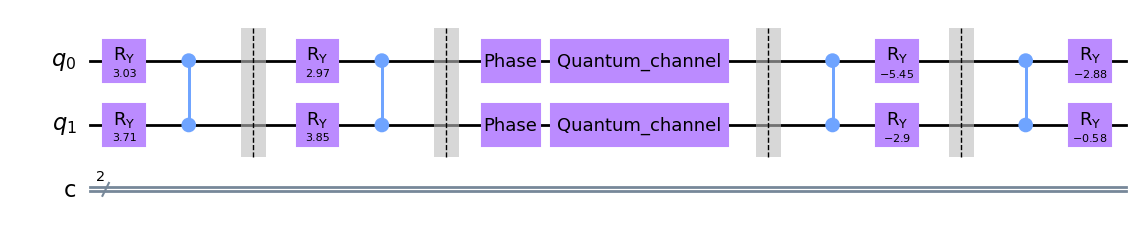

In [2]:
num_qubits = 2
t = 1.0

cirs =[star_ansatz, u_phase, dephasing, star_ansatz_inv]
coefs = [2,t,t,2] #num_players, time, 

phases = np.array([np.pi/6., np.pi/6., np.pi/6.])
lamb = 0.1
y = vqa.constants.lamb2y(t,lamb) 
params = create_params(cirs,coefs,num_qubits,['random',phases,[y],'random'])

# setup a model 
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
model = qc_add(qc, cirs, coefs, params)
model.draw('mpl')


(0.0, 1.0)

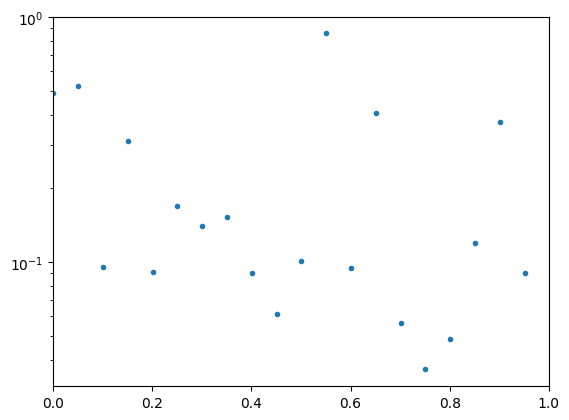

In [3]:
#run barren plateau 

nindx = np.arange(0.001, 1, 0.05).tolist()
bps = []
for i in nindx:
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    y = vqa.constants.lamb2y(t,i) #change lamb i
    params = create_params(cirs,coefs,num_qubits,['random',phases,[y],'random'])

    bp = vqa.plateau.plateau(qc,
                             cirs,
                             coefs,
                             params,
                             cost_func = vqa.fitting.bound_sld_cls,
                             num_samples = 100)
    bps.append(np.real(bp))
    

# plot
plt.semilogy(nindx, bps, '.')
plt.xlim(0, 1)

(0.0, 1.0)

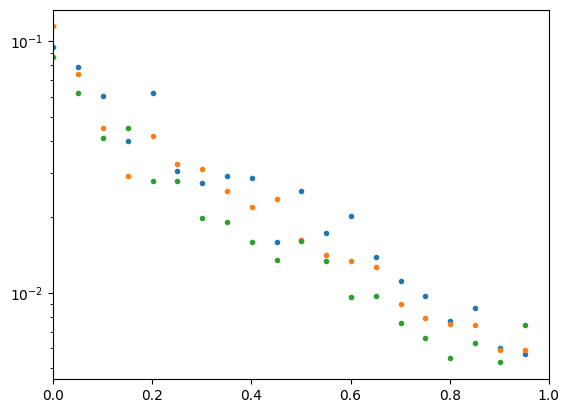

In [4]:
import matplotlib.pyplot as plt

x = [0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001]
ystar = [0.09501880654519514, 0.07857840931558979, 0.0603006068407432, 0.040205107419873605, 0.06238766509678797, 0.03047150305420126, 0.02733212208228261, 0.029162037338447844, 0.02847696629044725, 0.01591015992766915, 0.025235264493195207, 0.017300149756421662, 0.02021651233833391, 0.013795098028697312, 0.011146259498409588, 0.009666324059659396, 0.007714322454074458, 0.008663075569554063, 0.0060080094226958695, 0.005705041817965704]
ypoly = [0.11420168703571265, 0.07362139222225164, 0.045032761752803484, 0.028966193564247057, 0.04173427267263526, 0.03236429737386962, 0.03113259877380706, 0.025430376211742427, 0.021921188874668714, 0.02356985126509473, 0.016122325984426346, 0.014063461814489192, 0.01339441967087144, 0.012621969496793655, 0.008970590315990528, 0.007954152102685968, 0.007519584539757695, 0.007415303404835537, 0.005905656735431095, 0.005897442255968853]
ysqueez = [0.08625378708093505, 0.06200247727063906, 0.04130926660208287, 0.0449446711635823, 0.02783526335656454, 0.027876519298507773, 0.019882258462121577, 0.019139321034717317, 0.015924357113526497, 0.01345327186558522, 0.016042100543499593, 0.013319398199606716, 0.009646970803245057, 0.009736339779482232, 0.007579109380248916, 0.006626400381438953, 0.005520200656835731, 0.0063262556048465715, 0.005277143739308373, 0.007420673793536054]
# plot
plt.semilogy(x, ystar, '.')
plt.semilogy(x, ypoly, '.')
plt.semilogy(x, ysqueez, '.')
plt.xlim(0, 1)